In [28]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('data.csv')
df.head()

,name,vojta,selfcare_unscaled,mobility_unscaled,total,selfcare,mobility
0,Brožová Markéta,6,48.0,31.0,20,60.5,52.2
1,Fůsek Kryštof,4,47.0,10.0,15,59.9,30.6
2,Horvátová Nela,7,73.0,56.0,31,100.0,85.2
3,Chinedu Denis Stanley,5,43.0,15.0,12,57.4,37.1
4,Kallasch Oliver,6,51.0,54.0,25,62.5,79.8


In [18]:
labels = {
    "total": "TCMS Total",
    "vojta": "LS dle Vojty",  
}

In [19]:
df.describe()

,vojta,selfcare_unscaled,mobility_unscaled,total,selfcare,mobility
count,25.000000,15.000000,15.000000,25.000000,25.000000,25.000000
mean,6.320000,49.133333,36.000000,28.440000,69.348000,67.000000
std,2.427619,20.691153,20.938686,14.736802,21.293703,27.979829
min,1.000000,9.000000,0.000000,0.000000,30.700000,0.000000
25%,6.000000,44.500000,21.500000,20.000000,59.300000,52.200000
50%,7.000000,48.000000,44.000000,31.000000,63.200000,68.700000
75%,8.000000,66.000000,54.000000,39.000000,85.100000,89.200000
max,9.000000,73.000000,58.000000,46.000000,100.000000,100.000000


### Hypotéza 1
H:Existuje  korelace  mezi  úrovní  hrubé  motoriky  a  kvalitou  trupové stability u pacientů sDMO. 

 - Čím  vyšší  má  dítě  Lokomoční  stadium  dle  Vojty,  tím  lepší  skóre  bude  mít vtestu TCMS 

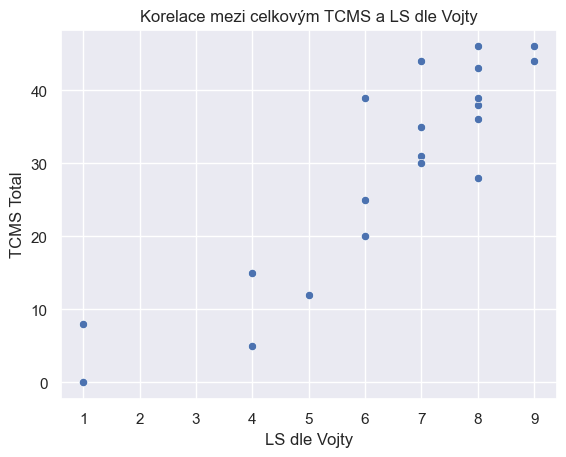

In [30]:
sns.set_theme(style="darkgrid")
gfg = sns.scatterplot(x="vojta", y="total", data=df)
_ = gfg.set(xlabel=labels["vojta"], ylabel=labels["total"], title="Korelace mezi celkovým TCMS a LS dle Vojty")
gfg.get_figure().savefig("plots/total_x_vojta.png")

Tyto dvě hodnotnám viditelně doclea korelují. Ještě tu korelaci spočítáme:
Korelace vychází velmi silná, 0.90 s velmi nízkou p-hodnotou, p=8.37e-10, tedy 8.37*10^(-10)

P-hodnota udává pravděpodobnost, že by v případě, že by ty dvě zkoumané veličiny (lokomoční stadium a tcms) byly zcela nezávislý, vyšla korelace alespoň takto vysoká - je to hodně málo pravděpodobné.

Ještě nabízím takový víc fancy graf, pokud bys hotam chtěl mít. Dá se to zobrazit dohromady s rozdělením těch jednotlivývh proměnných (histogramy) a regresní přímkou.

In [29]:
stats.pearsonr(df["total"], df["vojta"])

PearsonRResult(statistic=0.900853344481388, pvalue=8.372549413245284e-10)

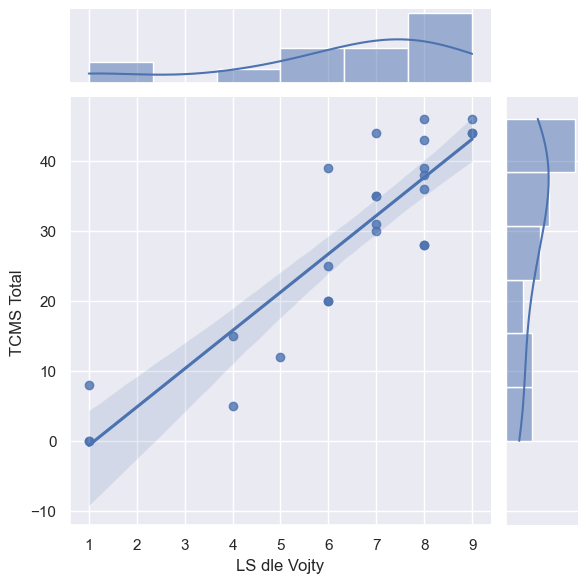

In [43]:
grid = sns.jointplot(x="vojta", y="total", data=df, kind="reg")
grid.set_axis_labels(labels["vojta"], labels["total"])
grid.figure.savefig("plots/total_x_vojta_joinplot.png")

### Hypotéza 2
Existuje spojitost mezi úrovní hrubé motoriky a mírou soběstačnosti a mobility u dětí sDMO

- Čím vyšší má dítě Lokomoční stadium dle Vojty, tím vyšší bude mít hrubé skóre vtestu PEDI (děti s vyšším  lokomočním stadiem dle Vojty budou mít vyšší hrubé skóre vtestu PEDI voblasti soběstačnost a mobilita)


Vzhledem k tomu, že PEDI skóre má dvě části, podíváme se nejdřív na korelaci lokomočního stádia a jednotlivývh dílčích skóre, tedy soběstačnosti a mobility. Následně pak na korelaci lokomočního stádia a nějaké agregace těch dvou hodnout - průměru. Vychází to opět dost korelovaně: 

- LS x soběstačnost: 0.74, p=2.25e-05
- LS x mobilita: 0.82, p=3.40e-07
- LS x průměr: 0.82, pvalue=2.97e-07

In [ ]:
df1 = df[['vojta', 'selfcare']].copy()
df1["PEDI"] = "Soběstačnost"
df1.rename(columns={"selfcare": "score"}, inplace=True)
df2 = df[['vojta', 'mobility']].copy()
df2["PEDI"] = "Mobilita"
df2.rename(columns={"mobility": "score"}, inplace=True)
df3 = df[['vojta']].copy()
df3['score'] = (df['selfcare'] + df['mobility']) / 2
df3["PEDI"] = "Průměr"
df_all = pd.concat([df1, df2, df3])

/Users/pavel.hlubik/hobbyspace/jirkovo-deti/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


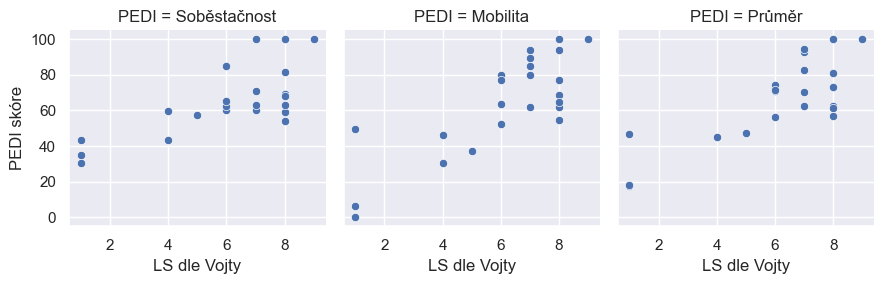

In [63]:
g = sns.FacetGrid(df_all, col="PEDI")
g.map(sns.scatterplot, "vojta",  "score")
_ = g.set_axis_labels(labels["vojta"], "PEDI skóre")
g.savefig("plots/pedi_x_vojta.png")

In [59]:
stats.pearsonr(df["vojta"], df["selfcare"])

PearsonRResult(statistic=0.7411674934026774, pvalue=2.2517128260864093e-05)

In [60]:
stats.pearsonr(df["vojta"], df["mobility"])

PearsonRResult(statistic=0.827268244850894, pvalue=3.400311611078162e-07)

In [62]:
# Correlation between vojta and average od selfcare and mobility
stats.pearsonr(df["vojta"], (df["selfcare"] + df["mobility"]) / 2)

PearsonRResult(statistic=0.8294128831429846, pvalue=2.9783482023579976e-07)